# Random Signals and LTI-Systems

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Introduction

The response of a system $y[k] = \mathcal{H} \{ x[k] \}$ to a random input signal $x[k]$ is the foundation of statistical signal processing. In the following we limit ourselves to [linear-time invariant (LTI) systems](https://en.wikipedia.org/wiki/LTI_system_theory).

![LTI system](LTI_system_td.png)

In the following it is assumed that the statistical properties of the input signal $x[k]$ are known. For instance, its first- and second-order ensemble averages. It is further assumed that the impulse response $h[k]$ or the transfer function $H(e^{\,\mathrm{j}\,\Omega})$ of the LTI system is given. We are looking for the statistical properties of the output signal $y[k]$ and the joint properties between the input $x[k]$ and output $y[k]$ signal.

## Stationarity and Ergodicity

The question arises if the output signal $y[k]$ of an LTI system is (wide-sense) stationary or (wide-sense) ergodic for an input signal $x[k]$ exhibiting the same properties.

Let's assume that the input signal $x[k]$ is drawn from a stationary random process. According to the [definition of stationarity](../random_signals/stationary_ergodic.ipynb#Definition) the following relation must hold

\begin{equation}
E\{ f(x[k_1], x[k_2], \dots) \} = E\{ f(x[k_1 + \Delta], x[k_2 + \Delta], \dots) \}
\end{equation}

where $\Delta \in \mathbb{Z}$ denotes an arbitrary (temporal) shift and $f(\cdot)$ an arbitary mapping function. The condition for time-invariance of a system reads

\begin{equation}
y[k + \Delta] = \mathcal{H} \{ x[k + \Delta] \}
\end{equation}

for $y[k] = \mathcal{H} \{ x[k] \}$. Applying the system operator $\mathcal{H}\{\cdot\}$ to the left- and right-hand side of the definition of stationarity for the input signal $x[k]$ and recalling the linearity of the expectation operator $E\{\cdot\}$ yields

\begin{equation}
E\{ g(y[k_1], y[k_2], \dots) \} = E\{ g(y[k_1 + \Delta], y[k_2 + \Delta], \dots) \}
\end{equation}

where $g(\cdot)$ denotes an arbitrary mapping function that may differ from $f(\cdot)$. From the equation above, it can be concluded that the output signal of an LTI system for a stationary input signal is also stationary. The same reasoning can also be applied to an [ergodic](../random_signals/stationary_ergodic.ipynb#Ergodic-Random-Processes) input signal. Since both wide-sense stationarity (WSS) and wide-sense ergodicity are special cases of the general case, the derived results hold also here.

Summarizing, for an input signal $x[k]$ that is

* (wide-sense) stationary, the output signal $y[k]$ is (wide-sense) stationary and the in- and output is jointly (wide-sense) stationary
* (wide-sense) ergodic, the output signal $y[k]$ is (wide-sense) ergodic and the in- and output is jointly (wide-sense) ergodic

This implies for instance, that for a WSS input signal $x[k]$ measures like the auto-correlation function (ACF) can also be applied to the output signal $y[k] = \mathcal{H} \{ x[k] \}$ of an LTI system.

### Example - Response of an LTI system to a random signal

The following example computes and plots estimates of the linear mean $\mu[k]$ and auto-correlation function (ACF) $\varphi[k_1, k_2]$ for the in- and output of an LTI system. The input $x[k]$ is drawn from a normally distributed white noise process.

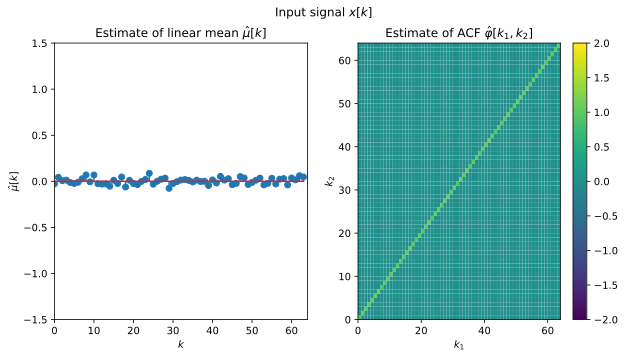

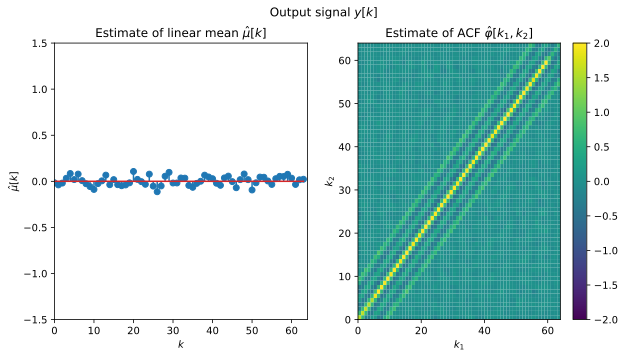

In [1]:
import numpy as np
import matplotlib.pyplot as plt

L = 64  # number of random samples
N = 1000  # number of sample functions

# generate input signal (white Gaussian noise)
np.random.seed(1)
x = np.random.normal(size=(N, L))
# generate output signal
h = 2*np.fft.irfft([1, 1, 1, 0, 0, 0])
y = np.asarray([np.convolve(x[n, :], h, mode='same') for n in range(N)])


def compute_plot_results(x):
    '''Compute and plot linear mean and ACF'''

    # estimate linear mean by ensemble average
    mu = 1/N * np.sum(x, 0)
    # estimate the auto-correlation function
    acf = np.zeros((L, L))
    for n in range(L):
        for m in range(L):
            acf[n, m] = 1/N * np.sum(x[:, n]*x[:, m], 0)

    plt.subplot(121)
    plt.stem(mu, use_line_collection=True)
    plt.title(r'Estimate of linear mean $\hat{\mu}[k]$')
    plt.xlabel(r'$k$')
    plt.ylabel(r'$\hat{\mu}[k]$')
    plt.axis([0, L, -1.5, 1.5])

    plt.subplot(122)
    plt.pcolor(np.arange(L+1), np.arange(L+1), acf, vmin=-2, vmax=2)
    plt.title(r'Estimate of ACF $\hat{\varphi}[k_1, k_2]$')
    plt.xlabel(r'$k_1$')
    plt.ylabel(r'$k_2$')
    plt.colorbar()
    plt.autoscale(tight=True)


plt.figure(figsize=(10, 5))
plt.gcf().suptitle(r'Input signal $x[k]$', fontsize=12)
compute_plot_results(x)

plt.figure(figsize=(10, 5))
plt.gcf().suptitle(r'Output signal $y[k]$', fontsize=12)
compute_plot_results(y)

**Exercise**

* Are the in- and output signals WSS?
* Can the output signal $y[k]$ be assumed to be white noise?

Solution: From the shown results it can assumed for the input signal $x[k]$ that the linear mean $\mu_x[k]$ does not depend on the time-index $k$ and that the ACF $\varphi_{xx}[k_1, k_2]$ does only depend on the difference $\kappa = k_1 - k_2$ of both time indexes. The same holds also for the output signal $y[k]$. Hence both the in- and output signal are WSS. Although the input signal $x[k]$ can be assumed to be white noise, the output signal $y[k]$ is not white noise due to its ACF $\varphi_{yy}[k_1, k_2]$.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples*.